## Libraries

In [311]:
import numpy as np 
import pandas as pd 
import xgboost as xg 
from sklearn.model_selection import train_test_split 
from sklearn.metrics import mean_squared_error
from matplotlib import pyplot as plt
import seaborn as sns


## Reading & Exploring Data

In [312]:
data_frame = pd.read_csv('machine.data',header=None)
cols = ['vendor','model','myct','mmin','mmax','cach','chmin','chmax','prp','erp']
data_frame.columns = cols
data_frame.head(2)

,vendor,model,myct,mmin,mmax,cach,chmin,chmax,prp,erp
0,adviser,32/60,125,256,6000,256,16,128,198,199
1,amdahl,470v/7,29,8000,32000,32,8,32,269,253


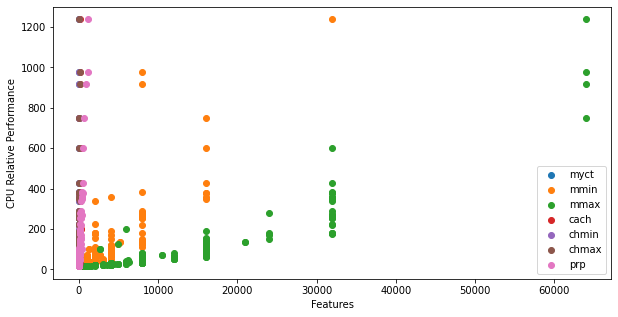

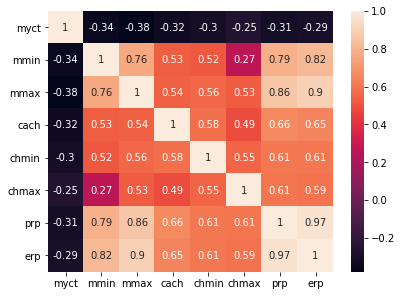

In [330]:
plt.figure(figsize=(10,5))
target = 'erp'
# features = ['prp','mmin','mmax','chmin']    #see last section. used 4 features here
features = cols[2:9]      #comment this and uncomment above for testing last section
for feature in features:
    plt.scatter(x=data_frame[feature],y=data_frame[target],label=feature,marker='o')
plt.xlabel("Features")
plt.ylabel("CPU Relative Performance")
plt.legend()
plt.show()
plt.figure(figsize=(6.4,4.8))
sns.heatmap(data=data_frame.corr(),annot=True)
plt.show()

## Separating Training & Test Data

In [331]:
x_train, x_test, y_train, y_test = train_test_split(data_frame[features],data_frame[target],
                                    test_size=0.35,random_state=40)

## Regression with XGBoost Tree

In [361]:
regressor = xg.XGBRegressor(n_estimators=50, learning_rate=0.1, gamma=1, subsample=0.75,
                           colsample_bytree=1, max_depth=5)

regressor.fit(x_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=1, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.1, max_delta_step=0, max_depth=5,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=50, n_jobs=4, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.75,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [362]:
results = regressor.predict(x_test)

## Model Accuracy

In [363]:
# using mse and its square-root
mse = mean_squared_error(y_test,results)
np.sqrt(mse)

19.276239859343264

In [364]:
# using absolute errors and mean absolute errors
absolute_errors = abs(results-y_test) #returns the array of errors
avg_abs_error = round(np.mean(absolute_errors))
avg_abs_error

10

In [365]:
# percentage of error using absolute errors
error_percentage = (absolute_errors/y_test) * 100
avg_error_percentage = np.mean(error_percentage)
print("Accuracy : " , round(100-avg_error_percentage), "%")

Accuracy :  90 %


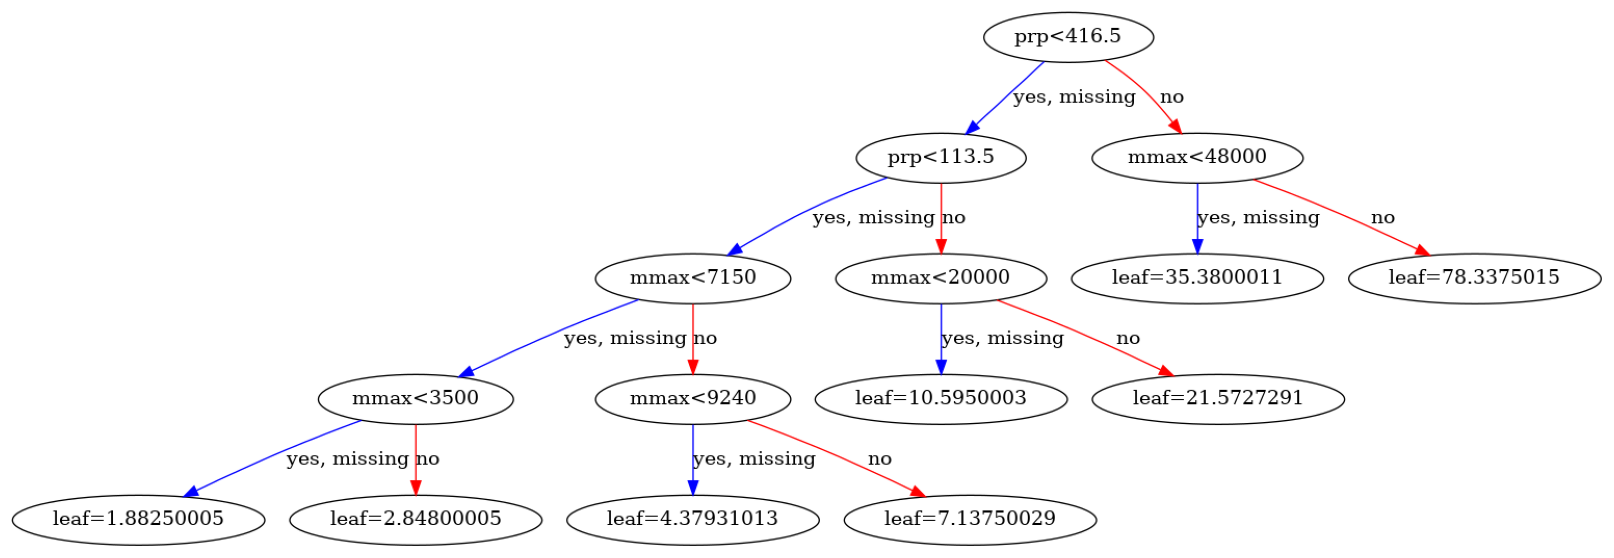

In [372]:
xg.plot_tree(regressor)
plt.show()


## Features Importances

0.95

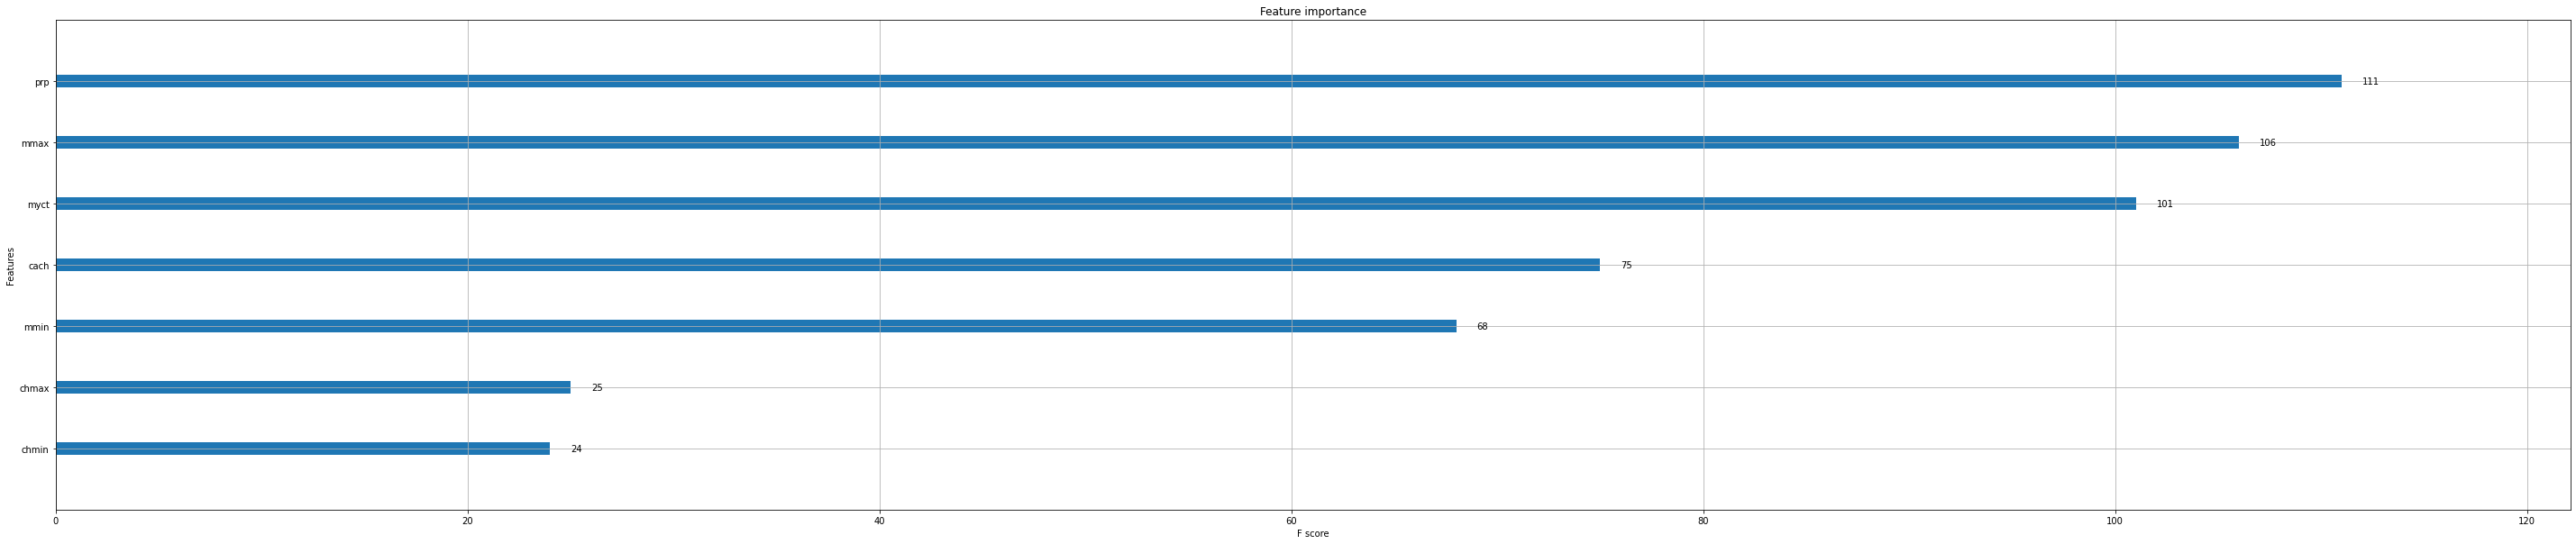

In [373]:
xg.plot_importance(regressor)
round(regressor.score(x_test,y_test),2)


## Plotting Predictions vs Actual 

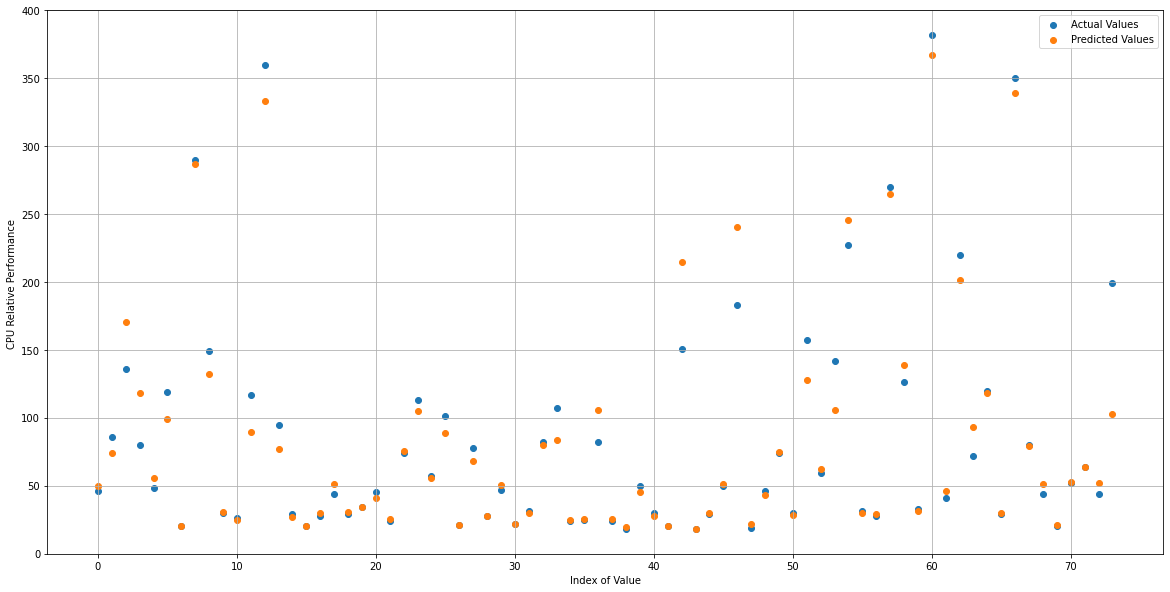

In [368]:
indexes = []   # this is as a dummy x-axis
for i in range(len(y_test)):
    indexes.append(i)
plt.figure(figsize=(20,10))
plt.scatter(indexes,y_test,label="Actual Values")
plt.scatter(indexes,results,label="Predicted Values")
plt.xlabel("Index of Value")
plt.ylabel("CPU Relative Performance ")
plt.legend()
plt.grid(True)
plt.show()

## Conclusion
Even without tuning the parameters, XGBoost Trees have proven the best. At ***(max-trees=50 & max-depth=5)*** only, it is giving 90% accuracy.